In [106]:
print(chr(27)+"[1;33m"+" PROFESOR RECUERDE CORREGIRME LAS DOS NOTAS EN CERO QUE TEBNGO DE LAS ACTIVIDADES")

 PROFESOR RECUERDE CORREGIRME LAS DOS NOTAS EN CERO QUE TEBNGO DE LAS ACTIVIDADES


<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



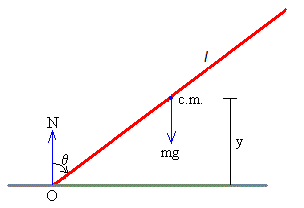


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [109]:
print(chr(27)+"[1;33m"+" PROFESOR RECUERDE CORREGIRME LAS DOS NOTAS EN CERO QUE TENGO DE LAS ACTIVIDADES POR FAVOR")

 PROFESOR RECUERDE CORREGIRME LAS DOS NOTAS EN CERO QUE TENGO DE LAS ACTIVIDADES POR FAVOR


In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.integrate import quad

In [65]:

def ecuacion_movimiento(y, t, g, l):
  theta, omega = y
  dtheta_dt = omega
  domega_dt = ( (2*g/l - omega**2*np.cos(theta)) / (1/3 + np.sin(theta)**2) )*np.sin(theta)
  return [dtheta_dt, domega_dt]


g = 9.8  # Aceleración de la gravedad (m/s^2)
l = 0.1   # Longitud del lápiz (m)

theta0 = np.pi/12  # Ángulo inicial (rad)
omega0 = 0.0       # Velocidad angular inicial (rad/s)
y0 = [theta0, omega0]


t_final = 1.0
t_steps = 1000
t = np.linspace(0, t_final, t_steps)


sol = odeint(ecuacion_movimiento, y0, t, args=(g, l))


theta = sol[:, 0]
y_cm = l/2 * np.cos(theta)
omega = sol[:, 1]



Text(0.5, 1.0, 'Posición angular del lápiz')

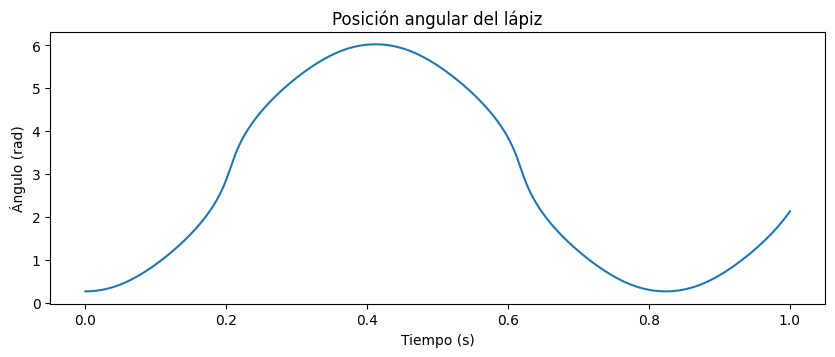

In [66]:

plt.figure(figsize=(10, 12))

# Posición angular
plt.subplot(3, 1, 1)
plt.plot(t, theta)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Posición angular del lápiz')


#Punto 1

In [91]:

L = 0.1  # Longitud del lápiz (m)
g = 9.8  # Aceleración de la gravedad (m/s^2)
theta0_values = np.linspace(np.pi/12,np.pi/2,5) # Ángulos iniciales
omega0 = 0  # Rapidez angular inicial

# Ecuación diferencial que describe el movimiento del lápiz
def ec_m(theta_omega, t, L, g):
    theta, omega = theta_omega
    dtheta_dt = omega
    domega_dt = (2 * g / L - omega**2 * np.cos(theta)) * np.sin(theta) / (1/3 + np.sin(theta)**2)
    return [dtheta_dt, domega_dt]

# Tiempo para la simulación
t = np.linspace(0, 2, 500)
def tiempo_caida(theta0):
    sol = odeint(ec_m, [theta0, omega0], t, args=(L, g))
    theta = sol[:, 0]
    t_c0 = np.interp(np.pi/2, theta[::-1], t[::-1])
    return t_c0





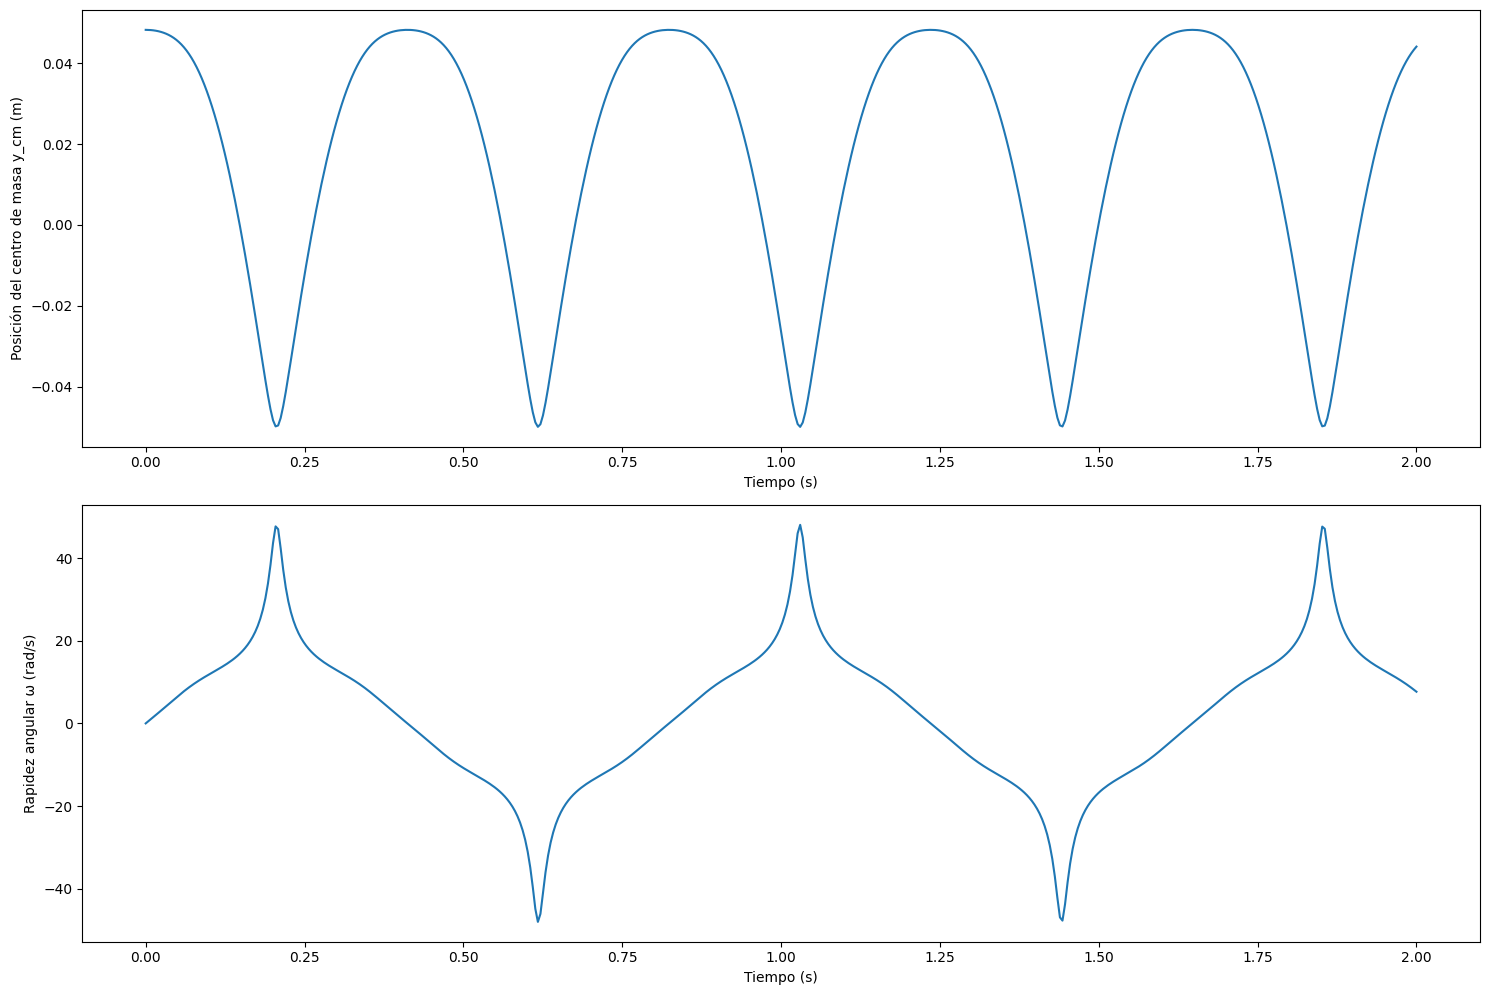

In [92]:

plt.figure(figsize=(15, 15))

sol = odeint(ec_m, [theta0_values[0], omega0], t, args=(L, g))
theta = sol[:, 0]
y_cm = (L/2) * np.cos(theta)
plt.subplot(3, 1, 2)
plt.plot(t, y_cm)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición del centro de masa y_cm (m)')


omega = sol[:, 1]
plt.subplot(3, 1, 3)
plt.plot(t, omega)
plt.xlabel('Tiempo (s)')
plt.ylabel('Rapidez angular ω (rad/s)')

plt.tight_layout()
plt.show()

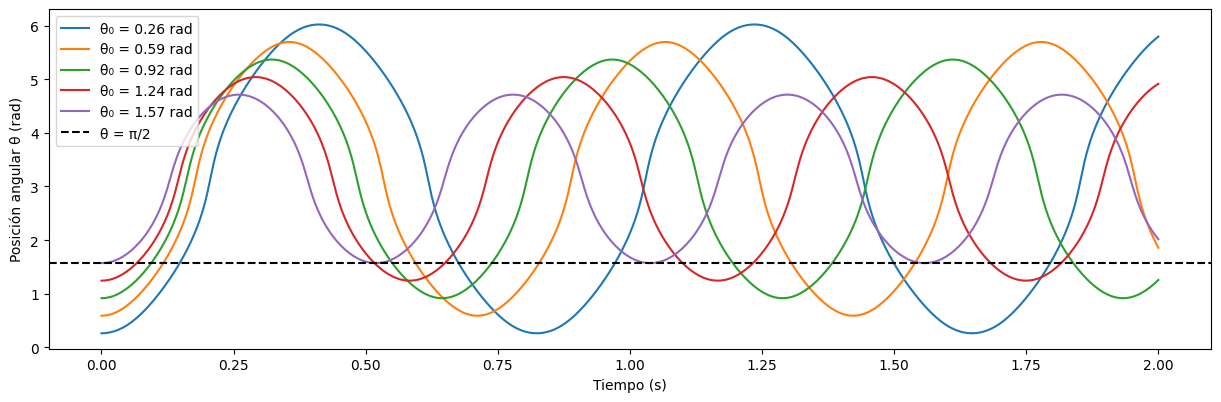

In [93]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
for theta0 in theta0_values:
    sol = odeint(ec_m, [theta0, omega0], t, args=(L, g))
    theta = sol[:, 0]
    plt.plot(t, theta, label=f'θ₀ = {theta0:.2f} rad')
plt.axhline(np.pi/2, color='k', linestyle='--',label="θ = π/2")
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición angular θ (rad)')
plt.legend()


In [97]:
t_caida = []
for theta0 in theta0_values:
    t_c = tiempo_caida(theta0)
    t_caida.append(t_c)
    print(f'Tiempo de caída para θ₀ = {theta0:.4f} rad: {t_c:.4f} s')

def tiempo_caida_integral(theta0, L, g):
    integrand = lambda theta: np.sqrt((1/3 + np.sin(theta)**2) / (np.cos(theta0) - np.cos(theta)))
    T_integral, _ = quad(integrand, theta0, np.pi/2)
    T = 0.5 * np.sqrt(L / g) * T_integral
    return T

Tiempo de caída para θ₀ = 0.2618 rad: 0.0000 s
Tiempo de caída para θ₀ = 0.5890 rad: 0.0000 s
Tiempo de caída para θ₀ = 0.9163 rad: 0.0000 s
Tiempo de caída para θ₀ = 1.2435 rad: 0.0000 s
Tiempo de caída para θ₀ = 1.5708 rad: 2.0000 s


In [98]:
for theta0, t_fall in zip(theta0_values, t_caida):
    T_theoretical = tiempo_caida_integral(theta0, L, g)
    print(f'Tiempo de caída teórico para θ₀ = {theta0:.2f} rad: {T_theoretical:.4f} s')

Tiempo de caída teórico para θ₀ = 0.26 rad: 0.1480 s
Tiempo de caída teórico para θ₀ = 0.59 rad: 0.1169 s
Tiempo de caída teórico para θ₀ = 0.92 rad: 0.0941 s
Tiempo de caída teórico para θ₀ = 1.24 rad: 0.0666 s
Tiempo de caída teórico para θ₀ = 1.57 rad: nan s


<ipython-input-97-68d2356ab79f>:8: RuntimeWarning: divide by zero encountered in scalar divide
  integrand = lambda theta: np.sqrt((1/3 + np.sin(theta)**2) / (np.cos(theta0) - np.cos(theta)))
<ipython-input-97-68d2356ab79f>:9: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  T_integral, _ = quad(integrand, theta0, np.pi/2)


In [100]:
import numpy as np
from scipy.integrate import quad

def tiempo_caida_integral(theta0, L, g):


  def integrando(theta):
    return np.sqrt((1/3 + np.sin(theta)**2) / (np.cos(theta0) - np.cos(theta)))


  T_integral, _ = quad(integrando, theta0, np.pi/2)
  T = 0.5 * np.sqrt(L / g) * T_integral
  return T


L = 0.1
g = 9.8
theta0_values = np.linspace(np.pi/12, np.pi/2)  # Ángulos iniciales


tiempos_caida_analitico = [tiempo_caida_integral(theta0, L, g) for theta0 in theta0_values]


print("Ángulo Inicial (rad)  | Tiempo de Caída Analítico (s)")
print("---------------------|-------------------------------")
for i, (theta0, t_caida) in enumerate(zip(theta0_values, tiempos_caida_analitico)):
  print(f"{theta0:.2f}               | {t_caida:.4f}")


Ángulo Inicial (rad)  | Tiempo de Caída Analítico (s)
---------------------|-------------------------------
0.26               | 0.1480
0.29               | 0.1443
0.32               | 0.1410
0.34               | 0.1380
0.37               | 0.1352
0.40               | 0.1326
0.42               | 0.1301
0.45               | 0.1278
0.48               | 0.1256
0.50               | 0.1234
0.53               | 0.1214
0.56               | 0.1194
0.58               | 0.1174
0.61               | 0.1155
0.64               | 0.1136
0.66               | 0.1118
0.69               | 0.1099
0.72               | 0.1081
0.74               | 0.1063
0.77               | 0.1044
0.80               | 0.1026
0.82               | 0.1007
0.85               | 0.0989
0.88               | 0.0970
0.90               | 0.0951
0.93               | 0.0931
0.96               | 0.0912
0.98               | 0.0892
1.01               | 0.0871
1.04               | 0.0850
1.06               | 0.0829
1.09               | 0.0

<ipython-input-100-21d9c7c41ec6>:8: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt((1/3 + np.sin(theta)**2) / (np.cos(theta0) - np.cos(theta)))
<ipython-input-100-21d9c7c41ec6>:11: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  T_integral, _ = quad(integrando, theta0, np.pi/2)


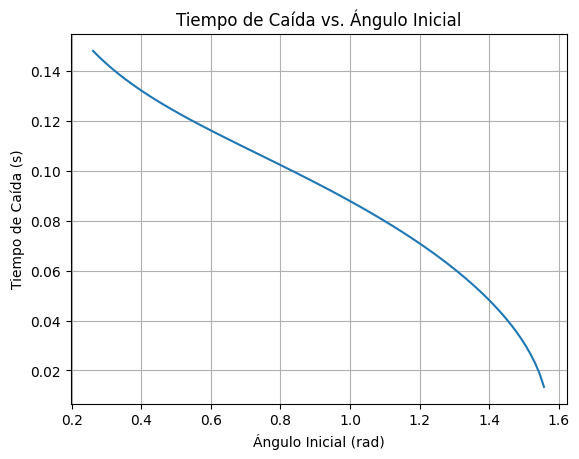

In [103]:

plt.plot(theta0_values, tiempos_caida_analitico)
plt.xlabel('Ángulo Inicial (rad)')
plt.ylabel('Tiempo de Caída (s)')
plt.title('Tiempo de Caída vs. Ángulo Inicial')
plt.grid(True)
plt.show()
